# 基于可解释性机器学习技术的学业成就归因分析

- 作者：$李坦^1$，$任伟祎^1$，$夏志文^1$
- 导师：$武法提^2$
- 单位：$1:北京师范大学教育技术学院$，$2:数字学习与教育公共服务教育部工程研究中心$
- 邮件：litan@mail.bnu.edu.cn

## 1.特征工程

### 1.1 导入必要的函数包

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 读取已经特征构建完毕的数据
hz_all = pd.read_csv("data/20221005psy_family_school_term_unit_diff.csv")

### 1.2 数据预处理

In [3]:
hz_all.head()

,gender,student_id,age_father,age_mother,edubg_father,edubg_mother,affiliation_father,affiliation_mother,family_income,is_only_child,...,term_acc,pass_or_not,level_2,level,unit-score,unit-full_score,acc,question_diffit_2,question_diffit,unit-count
0,Female,139500f93fff9334c2d6fe275d0d36dc,44,42,Primary School,Primary School,Unknown,Unknown,0-100000,Yes,...,0.437500,0,0,-1,20,103,0.194175,0.448662,0.551338,78
1,Male,df02f4beb55cc3a16cc366f59fcc2c8c,45,45,Secondary School (Academic Route (Junior)),Primary School,Sole Trader,Sole Trader,0-100000,No,...,0.807500,1,1,1,73,122,0.598361,0.548915,0.451085,81
2,Male,19cb70f8a755c40f628dc552745b2fee,42,37,Secondary School (Vocatioinal Route),Secondary School (Vocatioinal Route),Private Enterprise,Sole Trader,0-100000,No,...,0.783333,1,0,0,30,58,0.517241,0.520657,0.479343,26
3,Male,0c95cb66cbe37d838e5a15237f098768,41,39,Secondary School (Vocatioinal Route),Secondary School (Vocatioinal Route),Unknown,Unknown,100000-150000,Yes,...,0.886667,1,1,1,39,113,0.345133,0.571375,0.428625,53
4,Female,8d413a35e5862135b39d668738a61d3f,42,42,Higher National Diploma (full-time),Higher National Diploma (full-time),Sole Trader,Sole Trader,0-100000,Yes,...,0.845000,1,1,1,44,89,0.494382,0.615531,0.384469,43


In [4]:
# 对部分内容进行离散化处理
# 性别类，男性为1，女性为0
hz_all['gender'] = hz_all['gender'].map({'Male':1,'Female':2}).astype(int)

In [5]:
# 学校类型
hz_all['school_type'] = hz_all['school_type'].map({'9-Year School':1,'Combined Secondary School':2,'Regular Junior Secondary School':3}).astype(int)

In [6]:
# 父母教育背景
hz_all['edubg_father'] = hz_all['edubg_father'].map({'Higher National Diploma (full-time)':1,'Higher National Diploma (part-time)':2,'Postgraduate':3,'Primary School':4,'Secondary School (Academic Route (Junior))':5,'Secondary School (Academic Route (Senior))':6,'Secondary School (Vocatioinal Route)':7,'Undergraduate (full-time)':8,'Undergraduate (part-time)':9,'Unschooled':0}).astype(int)
hz_all['edubg_mother'] = hz_all['edubg_mother'].map({'Higher National Diploma (full-time)':1,'Higher National Diploma (part-time)':2,'Postgraduate':3,'Primary School':4,'Secondary School (Academic Route (Junior))':5,'Secondary School (Academic Route (Senior))':6,'Secondary School (Vocatioinal Route)':7,'Undergraduate (full-time)':8,'Undergraduate (part-time)':9,'Unschooled':0}).astype(int)

In [7]:
# 父母职业类型
hz_all['affiliation_father'] = hz_all['affiliation_father'].map({'Collective Enterprise':1,'Foreign-funded Enterprise':2,'Others':3,'Private Enterprise':4,'Public Sector':5,'Sole Trader':6,'State-owned Enterprise':7,'Unknown':0}).astype(int)
hz_all['affiliation_mother'] = hz_all['affiliation_mother'].map({'Collective Enterprise':1,'Foreign-funded Enterprise':2,'Others':3,'Private Enterprise':4,'Public Sector':5,'Sole Trader':6,'State-owned Enterprise':7,'Unknown':0}).astype(int)

In [8]:
# 家庭收入
hz_all['family_income'] = hz_all['family_income'].map({'0-100000':1,'100000-150000':2,'150000-200000':3,'200000-250000':4,'250000-300000':5,'300000 and above':6}).astype(int)

In [9]:
# 独生子女
hz_all['is_only_child'] = hz_all['is_only_child'].map({'Yes':1,'No':0}).astype(int)

In [10]:
# 是否住校
hz_all['live_on_campus'] = hz_all['live_on_campus'].map({'Yes':1,'No':0}).astype(int)

In [11]:
# 见父亲次数
hz_all['gathering_frequency_father'] = hz_all['gathering_frequency_father'].map({'once every day':1,'once every month':2,'once every six months':3,'once every week':4,'once more than a year':5}).astype(int)

In [12]:
# 见母亲次数
hz_all['gathering_frequency_mother'] = hz_all['gathering_frequency_mother'].map({'once every day':1,'once every month':2,'once every year':3,'once every week':4,'once more than a year':5}).astype(int)

In [13]:
hz_all.head(20)

,gender,student_id,age_father,age_mother,edubg_father,edubg_mother,affiliation_father,affiliation_mother,family_income,is_only_child,...,term_acc,pass_or_not,level_2,level,unit-score,unit-full_score,acc,question_diffit_2,question_diffit,unit-count
0,2,139500f93fff9334c2d6fe275d0d36dc,44,42,4,4,0,0,1,1,...,0.437500,0,0,-1,20,103,0.194175,0.448662,0.551338,78
1,1,df02f4beb55cc3a16cc366f59fcc2c8c,45,45,5,4,6,6,1,0,...,0.807500,1,1,1,73,122,0.598361,0.548915,0.451085,81
2,1,19cb70f8a755c40f628dc552745b2fee,42,37,7,7,4,6,1,0,...,0.783333,1,0,0,30,58,0.517241,0.520657,0.479343,26
3,1,0c95cb66cbe37d838e5a15237f098768,41,39,7,7,0,0,2,1,...,0.886667,1,1,1,39,113,0.345133,0.571375,0.428625,53
4,2,8d413a35e5862135b39d668738a61d3f,42,42,1,1,6,6,1,1,...,0.845000,1,1,1,44,89,0.494382,0.615531,0.384469,43
5,2,ee57aaa40fb59988b08358c5bf9f73b6,43,38,9,7,7,5,1,1,...,0.883333,1,1,1,26,27,0.962963,0.613313,0.386687,12
6,1,cabea3956f3be8c531a5dfbd59591a72,42,38,4,6,4,1,2,1,...,0.768333,1,0,0,8,34,0.235294,0.544927,0.455073,9
7,1,0cb7e33eb654fb862e71488ea73c254d,40,39,7,2,5,7,2,1,...,0.870000,1,1,1,9,16,0.562500,0.622751,0.377249,8
8,2,62ee44f8ed202a084f9f36abeba23e6f,41,40,7,7,2,3,1,0,...,0.630000,1,0,0,89,137,0.649635,0.575320,0.424680,80
9,1,fb70d50dc8f57cf51f73b39e50ff777e,40,39,7,7,3,3,2,1,...,0.752500,1,0,0,54,86,0.627907,0.614324,0.385676,54


## 2.模型的训练

### 2.1 数据标准化

In [14]:
y_hz_all=hz_all['level_2'] #标签                  
x_hz_all=hz_all[['psy_test_score','edubg_mother','edubg_father','rate_of_higher_educated_teachers','question_diffit','family_income',"rate_of_teachers_with_master's_degree_and_above",'dist_to_downtown','is_only_child']]

In [15]:
x_hz_all.columns

Index(['psy_test_score', 'edubg_mother', 'edubg_father',
       'rate_of_higher_educated_teachers', 'question_diffit', 'family_income',
       'rate_of_teachers_with_master's_degree_and_above', 'dist_to_downtown',
       'is_only_child'],
      dtype='object')

In [340]:
#数据标准化
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()                            #初始化特征的标准化器
X_data=ss_X.fit_transform(x_hz_all)                #对训练和测试数据的特征进行标准化处理

print(X_data)

[[-1.28327751 -0.62453021 -0.73531512 ...  0.21015243 -0.22250138
   0.64912632]
 [ 0.30287851 -0.62453021 -0.25805775 ...  1.22941824  1.58763562
  -1.54053219]
 [ 2.2418468   0.78433936  0.696457   ... -0.85048492 -0.81460226
  -1.54053219]
 ...
 [ 0.30287851  0.31471617 -0.25805775 ... -2.48150097  0.2680965
   0.64912632]
 [-1.28327751 -0.15490702  0.696457   ... -2.48150097  0.2680965
  -1.54053219]
 [-0.93046524 -0.62453021 -0.25805775 ... -2.48150097  0.2680965
   0.64912632]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_hz_all,y_hz_all, test_size=0.4, random_state=42)

### 2.2 模型训练

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#### 2.2.1 逻辑回归

In [18]:
lr=LogisticRegression()
score=cross_val_score(lr,x_hz_all,y_hz_all,cv=5,scoring='accuracy')#5折：交叉验证
print ('平均准确率',score.mean())
print ('每则准确率',score)

lr=lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

#print("预测的文章类别为：", y_predict)  # [4 18 8 ..., 15 15 4]
# 准确率
print("准确率为：", lr.score(X_test, y_test))  # 0.853565365025
print("每个类别的精确率和召回率：", classification_report(y_test, y_predict))

平均准确率 0.7099342105263158
每则准确率 [0.66666667 0.67708333 0.71875    0.71875    0.76842105]
准确率为： 0.7135416666666666
每个类别的精确率和召回率：               precision    recall  f1-score   support

           0       0.74      0.79      0.76       113
           1       0.67      0.61      0.64        79

    accuracy                           0.71       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.71      0.71      0.71       192



C:\ProgramData\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

#### 2.2.2 SVM

In [19]:
from sklearn.metrics import log_loss
#线性SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Cs=[0.001,0.01,0.1,1,10,100,1000]
param_grid={'C':Cs}
grid=GridSearchCV(SVC(kernel='linear'),param_grid,cv=5)
grid.fit(x_hz_all,y_hz_all)

grid=grid.fit(X_train, y_train)

y_predict = grid.predict(X_test)

#print("预测的文章类别为：", y_predict)  # [4 18 8 ..., 15 15 4]
# 准确率
print("准确率为：", grid.score(X_test, y_test))  # 0.853565365025
print("每个类别的精确率和召回率：", classification_report(y_test, y_predict))
print("最佳参数:",grid.best_params_,"正确率:",grid.best_score_)

准确率为： 0.7135416666666666
每个类别的精确率和召回率：               precision    recall  f1-score   support

           0       0.74      0.79      0.76       113
           1       0.67      0.61      0.64        79

    accuracy                           0.71       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.71      0.71      0.71       192

最佳参数: {'C': 0.1} 正确率: 0.6758620689655173


#### 2.3 朴素贝叶斯

In [19]:
from sklearn.naive_bayes import GaussianNB
x_data = x_hz_all
nb=GaussianNB()
score=cross_val_score(nb,x_data,y_hz_all,cv=5,scoring='accuracy')#10折：交叉验证

model_NB=nb.fit(X_train,y_train)
y_predict = model_NB.predict(X_test)
print(classification_report(y_test, y_predict))
print ('平均准确率',score.mean())
print ('每则准确率',score)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       113
           1       0.79      0.52      0.63        79

    accuracy                           0.74       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.75      0.74      0.73       192

平均准确率 0.6806359649122807
每则准确率 [0.6875     0.65625    0.70833333 0.64583333 0.70526316]


#### 2.4SVM

In [20]:
from sklearn.svm import SVC
x_data = x_hz_all
svc=SVC(kernel='linear', C=0.1)
score=cross_val_score(svc,x_data,y_hz_all,cv=5,scoring='accuracy')#10折：交叉验证

print ('平均准确率',score.mean())
print ('每则准确率',score)

model=svc.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

平均准确率 0.6974122807017544
每则准确率 [0.61458333 0.67708333 0.70833333 0.72916667 0.75789474]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       113
           1       0.67      0.61      0.64        79

    accuracy                           0.71       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.71      0.71      0.71       192



#### 2.5 DT

In [21]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

x_data = x_hz_all
tree = DecisionTreeClassifier(random_state=0)
score=cross_val_score(tree,x_data,y_hz_all,cv=10,scoring='accuracy')#10折：交叉验证

tree_model=tree.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

print(classification_report(y_test, y_predict))
print ('平均准确率',score.mean())
print ('每则准确率',score)



              precision    recall  f1-score   support

           0       0.65      0.64      0.65       113
           1       0.50      0.52      0.51        79

    accuracy                           0.59       192
   macro avg       0.58      0.58      0.58       192
weighted avg       0.59      0.59      0.59       192

平均准确率 0.5928191489361703
每则准确率 [0.54166667 0.5        0.625      0.625      0.54166667 0.79166667
 0.6875     0.4375     0.625      0.55319149]


In [22]:
import joblib 

# 保存模型
joblib.dump(model,'svm.model') 

['svm.model']

## 3.基于SHAP的可解释性分析

In [23]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
#from keras.models import load_model
import matplotlib.pyplot as plt
from SALib.plotting.bar import plot as barplot
import math
import shap
import joblib
#from sklearn.externals import joblib
import pandas as pd
import scipy.io as io
from scipy.io import loadmat
import h5py #针对-v7.3格式
#model = joblib.load('tree.model')

In [24]:
X_train_summary = shap.kmeans(X_train,2)

In [25]:
explainer = shap.KernelExplainer(model_NB.predict,X_train_summary)

shap_values = explainer.shap_values(X_train) #生成SHAP值

  0%|          | 0/287 [00:00<?, ?it/s]

In [26]:
shap_values

array([[ 0.54703833,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.41521487,  0.03774681,  0.03774681, ...,  0.        ,
        -0.11324042,  0.        ],
       [ 0.8641115 ,  0.        , -0.02264808, ...,  0.        ,
        -0.02264808,  0.        ],
       ...,
       [-0.41521487,  0.        ,  0.        , ...,  0.03774681,
         0.03774681,  0.        ],
       [-0.17291632,  0.05194679, -0.00251645, ..., -0.07801007,
         0.00341519, -0.17291632],
       [-0.13912394,  0.        , -0.02588352, ..., -0.0107848 ,
        -0.13912394, -0.13912394]])

In [27]:
#columns=['E1', 'D5', 'D6', 'D3', 'D4','D1', 'D2', 'D9','E2', 'E3', 'D10','D11', 'D12','A1','D14','D15',"D16", 'C1', 'B1']
columns=['A1', 'D2', 'D1','D15', 'C1', 'D9','D16', 'D14','E2']
# columns=['E1', 'D5', 'D6', 'D3', 'D4','D1', 'D2', 'D9','E2', 'E3', 'D10','D11', 'D12','A1', 'D13', 'D14','D15',"D16", 'B2','C1', 'B1']
#['E1', 'B2', 'D5', 'D6', 'D3','D4', 'D1', 'D2','D9', 'E2', 'E3','D10', 'D11','D12', 'A1', 'D13','D14', 'D15','D16','C1']

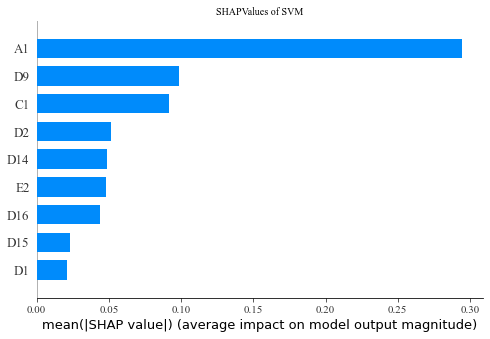

<Figure size 432x288 with 0 Axes>

In [28]:
plt.title('SHAPValues of SVM',fontproperties='Times New Roman', size=10)
plt.xticks( fontproperties='Times New Roman', size=20) #定义字体及大小
plt.yticks(fontproperties='Times New Roman', size=20)
shap.summary_plot(shap_values, X_test, feature_names=columns,  plot_type="bar", max_display=40)
plt.show()
plt.savefig("NB.png")

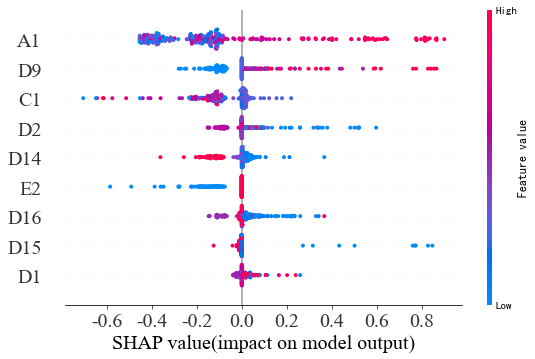

In [29]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.summary_plot(shap_values, X_train,feature_names=columns, show=False)
plt.xticks( fontproperties='Times New Roman', size=20)
plt.yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('SHAP value(impact on model output)', fontproperties='Times New Roman',fontsize=20)
plt.tight_layout()
plt.savefig("my_dependence_plot.tiff")

In [30]:
shap.initjs()  # 初始化JS
shap.force_plot(explainer.expected_value, shap_values, X_train)#,show=False

In [31]:
name =['A1', 'D2', 'D1','D15', 'C1', 'D9','D16', 'D14','E2']
name = np.array(name).reshape(1,9) 
data_with_name = pd.DataFrame(X_train)
data_with_name.columns = ['A1', 'D2', 'D1','D15', 'C1', 'D9','D16', 'D14','E2']

In [32]:
X_test

,psy_test_score,edubg_mother,edubg_father,rate_of_higher_educated_teachers,question_diffit,family_income,rate_of_teachers_with_master's_degree_and_above,dist_to_downtown,is_only_child
93,95.11,3,6,0.973913,0.330472,5,0.304348,0.5,1
320,68.66,5,5,0.977778,0.639741,2,0.188889,6.8,0
55,95.11,9,9,0.951807,0.440474,6,0.114458,3.3,1
30,81.01,5,9,0.948276,0.455073,2,0.166667,8.5,0
449,84.53,6,6,0.982143,0.415753,1,0.135714,4.8,1
...,...,...,...,...,...,...,...,...,...
445,77.48,5,5,0.979167,0.426125,1,0.260417,17.5,1
192,100.41,6,6,0.982143,0.386687,3,0.135714,4.8,0
342,75.71,6,1,0.948276,0.455073,2,0.166667,8.5,0
119,105.70,5,5,0.982143,0.459897,1,0.135714,4.8,1


In [33]:
y_train

287    1
301    0
340    1
203    0
231    0
      ..
106    0
270    1
348    0
435    0
102    0
Name: level_2, Length: 287, dtype: int64

In [34]:
data_with_name

,A1,D2,D1,D15,C1,D9,D16,D14,E2
287,112.75,8,8,0.982143,0.428625,2,0.135714,4.8,1
301,79.24,9,2,0.979167,0.432013,2,0.260417,17.5,1
340,100.41,5,5,0.948276,0.455073,1,0.166667,8.5,1
203,100.41,5,4,0.943396,0.214248,1,0.270440,20.1,0
231,81.01,5,2,0.982143,0.345869,1,0.135714,4.8,1
...,...,...,...,...,...,...,...,...,...
106,73.95,5,4,0.948276,0.455073,1,0.166667,8.5,0
270,102.17,7,6,0.951807,0.345869,1,0.114458,3.3,1
348,75.71,7,7,0.951807,0.377249,1,0.114458,3.3,1
435,79.24,4,4,0.977778,0.414552,1,0.188889,6.8,0


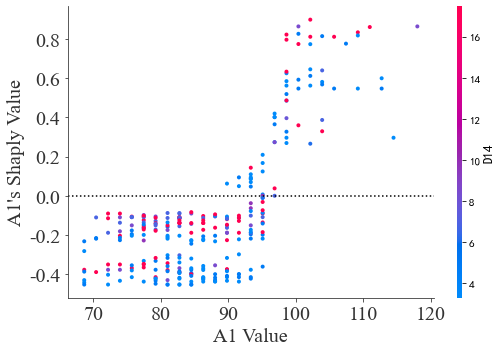

In [35]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.dependence_plot("A1", shap_values, data_with_name, interaction_index="D14",show=False) #绘制Feature1的dependence图,
plt.xticks( fontproperties='Times New Roman', size=20)
plt.axhline(y=0, ls='dotted', color='k')
plt.yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('A1 Value',fontproperties='Times New Roman', fontsize=20)
plt.ylabel("A1's Shaply Value", fontproperties='Times New Roman',fontsize=20)
plt.tight_layout()
plt.savefig("A1ShaplyValue-interaction.tiff")

(array([ 7.,  0.,  0.,  4.,  0.,  0.,  0.,  7.,  0.,  0., 10.,  0.,  0.,
         0., 12.,  0.,  0., 18.,  0.,  0.,  0., 16.,  0.,  0.,  0., 18.,
         0.,  0., 28.,  0.,  0.,  0., 18.,  0.,  0., 17.,  0.,  0.,  0.,
        12.,  0.,  0., 18.,  0.,  0.,  0., 13.,  0.,  0.,  0., 20.,  0.,
         0., 18.,  0.,  0.,  0.,  8.,  0.,  0., 13.,  0.,  0.,  0.,  6.,
         0.,  0.,  7.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 68.66  ,  69.1538,  69.6476,  70.1414,  70.6352,  71.129 ,
         71.6228,  72.1166,  72.6104,  73.1042,  73.598 ,  74.0918,
         74.5856,  75.0794,  75.5732,  76.067 ,  76.5608,  77.0546,
         77.5484,  78.0422,  78.536 ,  79.0298,  79.5236,  80.0174,
         80.5112,  81.005 ,  81.4988,  81.9926,  82.4864,  82.9802,
         83.474 ,  83.9678,  84.4616,  84.9554,  85.4492,  85.943 ,
         86.4368,  86.9306

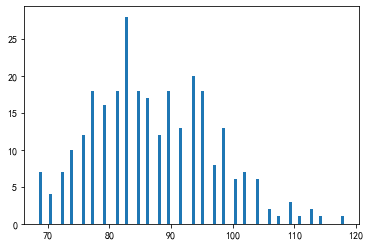

In [36]:
plt.hist(data_with_name['A1'],bins=100)

平均数： 87.10728222996507
中位数： 86.3
上四分之一数： 93.35
下四分之一数： 79.24
上界： 114.51
up: 114.51499999999999
down: 58.074999999999996
下界： 68.66


{'whiskers': [<matplotlib.lines.Line2D at 0x1b4753ff340>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4753ff880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b475234af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4753fffa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b475410700>],
 'means': [<matplotlib.lines.Line2D at 0x1b475410370>]}

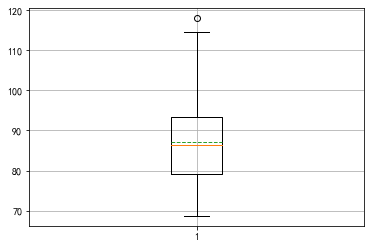

In [37]:
x=data_with_name['A1']
a = np.quantile(x, 0.75)  # 上四分之一数
b = np.quantile(x, 0.25)  # 下四分之一数
print("平均数：", np.mean(x))  # 打印均值
print("中位数：", np.median(x))  # 打印中位数
print("上四分之一数：", a)  # 打印上四分之一数
print("下四分之一数：", b)  # 打印下四分之一数
up = a + 1.5 * (a - b)  # 异常值判断标准
down = b - 1.5 * (a - b)  # 异常值判断标准
x = np.sort(x)  # 对原始数据排序
shangjie = x[x < up][-1]  # 除了异常值外的最大值
xiajie = x[x > down][0]  # 除了异常值外的最小值
print("上界：", shangjie)  # 打印上界
print("up:", up)
print("down:", down)
print("下界：", xiajie)  # 打印下界
plt.grid(True)  # 显示网格
plt.boxplot(data_with_name['A1'],meanline=True, showmeans=True) 

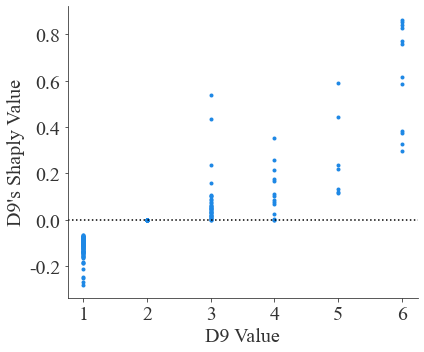

In [38]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.dependence_plot("D9", shap_values, data_with_name, interaction_index=None,show=False) #绘制Feature1的dependence图
plt.xticks( fontproperties='Times New Roman', size=20)
plt.axhline(y=0, ls='dotted', color='k')
plt.yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('D9 Value',fontproperties='Times New Roman', fontsize=20)
plt.ylabel("D9's Shaply Value", fontproperties='Times New Roman',fontsize=20)
plt.tight_layout()
plt.savefig("D9ShaplyValue.tiff")

(array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         12.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
        2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
        2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15,
        3.2 , 3.25, 3.

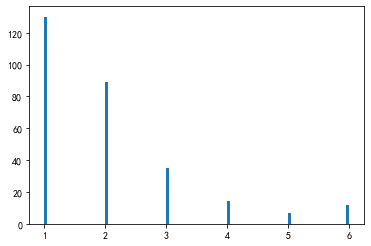

In [39]:
plt.hist(data_with_name['D9'],bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4752288b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4752280a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b475228160>],
 'medians': [<matplotlib.lines.Line2D at 0x1b475218790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4752183a0>],
 'means': []}

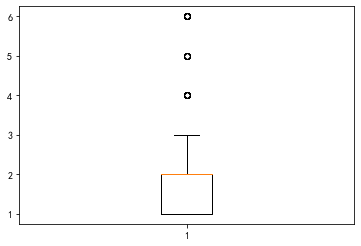

In [40]:
plt.boxplot(data_with_name['D9']) 

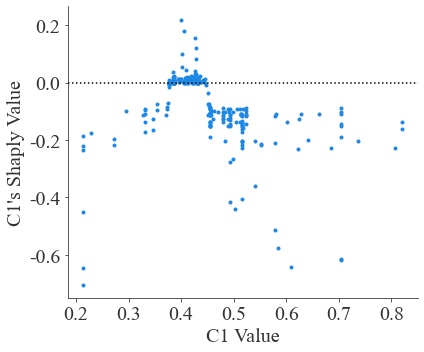

In [41]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.dependence_plot("C1", shap_values, data_with_name, interaction_index=None,show=False) #绘制Feature1的dependence图
plt.xticks( fontproperties='Times New Roman', size=20)
plt.axhline(y=0, ls='dotted', color='k')
plt.yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('C1 Value',fontproperties='Times New Roman', fontsize=20)
plt.ylabel("C1's Shaply Value", fontproperties='Times New Roman',fontsize=20)
plt.tight_layout()
plt.savefig("C1ShaplyValue.tiff")

(array([ 6.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  5.,  0.,  2.,  0.,  2.,  0.,  1.,
        15.,  1., 26.,  1.,  7.,  8., 13.,  8., 16., 42.,  5.,  2.,  3.,
        28.,  2.,  0.,  1.,  7.,  2., 14.,  1.,  3.,  1., 23.,  2.,  6.,
         0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  4.,  1.,  0.,  1.,  0.,
         1.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([0.21424816, 0.22030012, 0.22635209, 0.23240405, 0.23845601,
        0.24450797, 0.25055994, 0.2566119 , 0.26266386, 0.26871583,
        0.27476779, 0.28081975, 0.28687171, 0.29292368, 0.29897564,
        0.3050276 , 0.31107957, 0.31713153, 0.32318349, 0.32923545,
        0.33528742, 0.34133938, 0.34739134, 0.35344331, 0.35949527,
        0.36554723, 0.37159919, 0.37765116, 0.38370312, 0.38975508,
        0.39580705, 0.4018

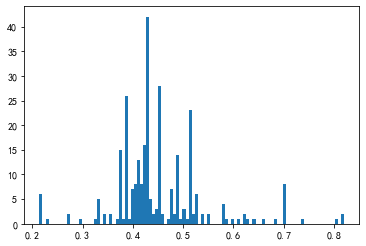

In [42]:
plt.hist(data_with_name['C1'],bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4750d1fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4750bb700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4750d1c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4750bbe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4750ba1f0>],
 'means': []}

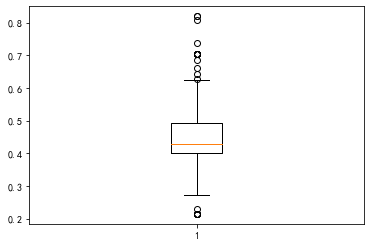

In [43]:
plt.boxplot(data_with_name['C1']) 

In [49]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3], data_with_name.iloc[3,:])
# plt.xticks( fontproperties='Times New Roman', size=20)
# plt.axhline(y=0, ls='dotted', color='k')
# plt.yticks(fontproperties='Times New Roman', size=20)
# plt.xlabel('A1 Value',fontproperties='Times New Roman', fontsize=20)
# plt.ylabel("A1's Shaply Value", fontproperties='Times New Roman',fontsize=20)
# plt.tight_layout()
#plt.savefig("S3.tiff")

AttributeError: 'function' object has no attribute 'waterfall'